In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import IFrame


In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/carabedo/labs/master/data/freddo.csv')
df.venta=df.venta+200

In [ ]:
df

,temp,venta
0,12.2,325
1,14.4,375
2,15.0,525
3,16.7,475
4,17.8,625
5,18.3,600
6,19.4,650
7,22.2,625
8,22.8,650
9,23.9,725


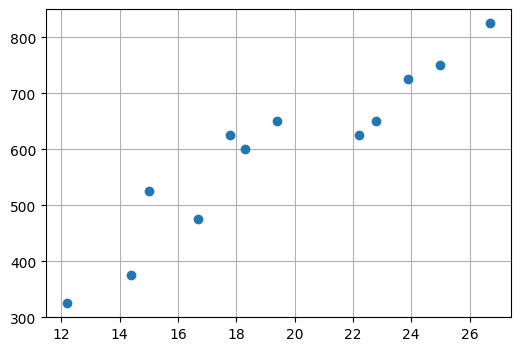

In [ ]:
plt.figure(figsize=[6,4])
plt.plot(df.temp,df.venta,'o')
plt.grid(True)

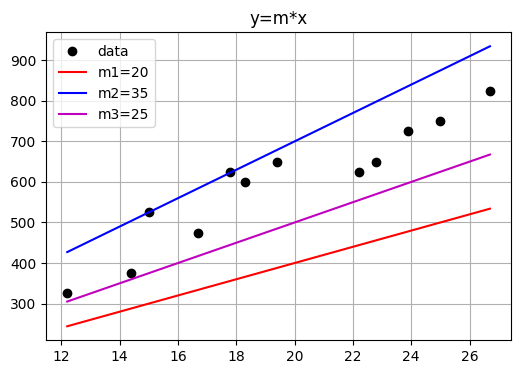

In [ ]:
x=df.temp
y=df.venta
plt.figure(figsize=[6,4])
plt.plot(x,y,'ok')
plt.plot(x,20*x,'-r')
plt.plot(x,35*x,'-b')
plt.plot(x,25*x,'-m')
plt.legend(['data','m1=20','m2=35','m3=25'])
plt.title('y=m*x')
plt.grid(True)

![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTa6R9GiesjDcNRA3OUNj2Scm3t426fWbqByA&s)

In [ ]:
def mse(y,y_pred):
  return np.mean((y-y_pred)**2)

In [ ]:
y_pred1=20*x
y_pred2=35*x
y_pred3=25*x

In [ ]:
mse1=mse(y,20*x)
mse2=mse(y,35*x)
mse3=mse(y,25*x)

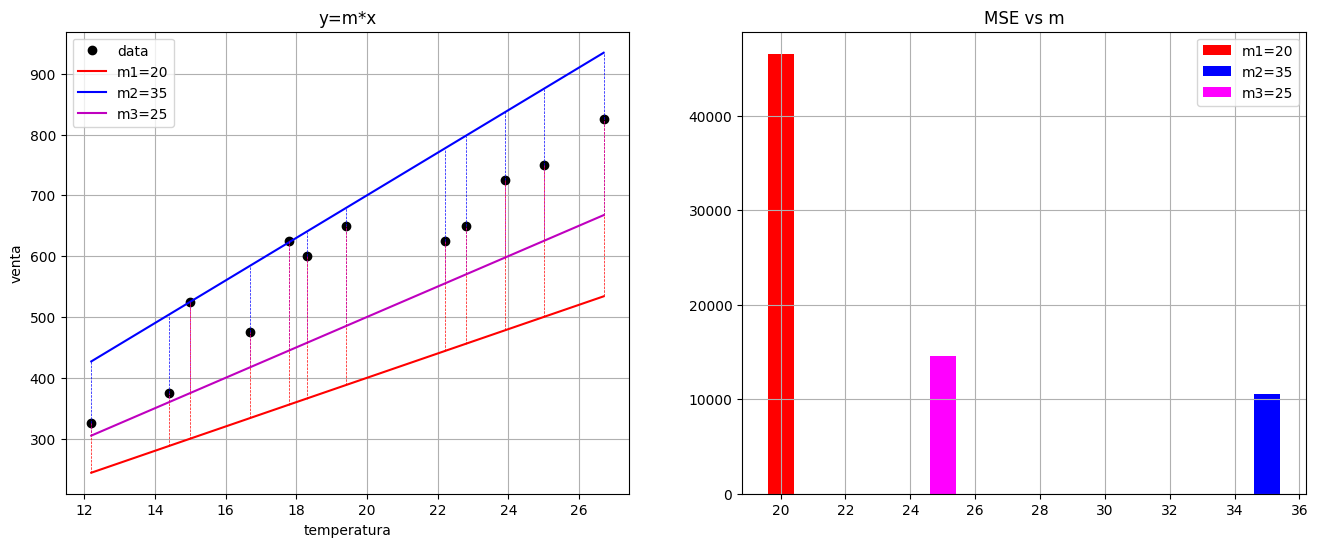

In [ ]:
x=df.temp
y=df.venta
plt.figure(figsize=[16,6])
plt.subplot(1,2,1)
plt.plot(x,y,'ok')
plt.plot(x,y_pred1,'-r')
plt.plot(x,y_pred2,'-b')
plt.plot(x,y_pred3,'-m')
# Add vertical lines to depict the residuals
for i in range(len(x)):
    plt.vlines(x=x[i], ymin=min(y[i], y_pred1[i]), ymax=max(y[i], y_pred1[i]), color='r', linestyle='--', label='_nolegend_', linewidth=0.5)
    plt.vlines(x=x[i], ymin=min(y[i], y_pred2[i]), ymax=max(y[i], y_pred2[i]), color='b', linestyle='--', label='_nolegend_', linewidth=0.5)
    plt.vlines(x=x[i], ymin=min(y[i], y_pred3[i]), ymax=max(y[i], y_pred3[i]), color='m', linestyle='--', label='_nolegend_', linewidth=0.5)


plt.legend(['data','m1=20','m2=35','m3=25'])
plt.title('y=m*x')
plt.xlabel('temperatura')
plt.ylabel('venta')
plt.grid(True)

plt.subplot(1,2,2)
plt.bar([20],[mse1],color='red')
plt.bar([35],[mse2],color='blue')
plt.bar([25],[mse3],color='magenta')
plt.legend(['m1=20','m2=35','m3=25'])
plt.title('MSE vs m')
plt.grid(True)

In [ ]:
url = "https://carabedo.github.io/playground/mse1d"
IFrame(url, width=1200, height=600)

Supongamos una variable `y` que tiene una dependencia $F(x)$ con las variables $x$ y sea $\epsilon$ la parte aleatoria inherente que no puede ser descripta (ruido).

<br>


<center>$\huge y= F(x)  + \epsilon $</center>

<br>

Nuestro objetivo cuando realizamos un ajuste es encontrar una funcion parecida que permita realizar predicciones que se asemejen a $y$.


Por ejemplo:

<br>
<center>$\Large  y_{pred} = \beta_0 + \beta_1 \cdot x$</center>

Con suerte:

<br>
<center>$\huge  y_{pred} \approx y  $</center>
<br>

Dezconocemos la verdadera formula de $F(x)$ con las dependencia explicitas de las variables x.

Una solucion muy simple a este problema es proponer una relacion lineal, para cual:


<br>
<br>

<center>$\Large  y_{pred} = \beta_0 + \beta_1 \cdot x$</center>

<br>
<br>

El problema ahora se reduce en contrar $\beta_0$ y $\beta_1$.

Que buscamos?

Tener un modelo que se parezca lo mas posible a los datos, esto significa una prediccion que tenga el menor error posible.


<center>$\Large Error=y_{pred} - y  $</center>
<br>

Para cuantificar el error de  la regresion lineal podemos mirar el MSE:

 $$\frac{1}{N}\sum_{i}^N (y_{pred}^{(i)} - y^{(i)} )^2 $$

Si usamos la definicion de las predicciones $y_{pred}$ podemos reescribir el MSE como:

<br>
<center>$\Large MSE =\frac{1}{N} \sum_{i}^N (\bar{\beta} \cdot \bar{x}^{(i)}  -y^{(i)} )^2  $</center>
<br>

El supraindice indica la i-esima de N observaciones y $\bar{\beta}$ es el vector de coeficientes $(\beta_0 , \beta_1 ,  \beta_2 , ... , \beta_n)$ mientras $\bar{x}^{(i)}$ e $y^{(i)}$ son nuestros datos de entrenamiento.

https://carabedo.github.io/playground/regression

# Machine Learning

In [ ]:
url = "https://carabedo.github.io/playground/mse1d"
IFrame(url, width=1200, height=600)

Suponiendo un problema en una dimension y con un solo parametro icognita 'm':

$$ MSE =\frac{1}{N} \sum_{i}^N ( m \cdot x_{i}  -y_{i} )^2  $$

Llamamos a esto funcion de perdida:

$$ Loss =\frac{1}{N} \sum_{i}^N ( m \cdot x_{i}  -y_{i} )^2  $$

Y dado que $x_{i}$ y $y_{i}$ son las valores x e y de las N filas del dataset, la unica incognita es m.

$$ Loss(m) =\frac{1}{N} \sum_{i}^N ( m \cdot x_{i}  -y_{i} )^2  $$

El objetivo es encontrar el valor de m que minimice la funcion de costo.

## Minimos y Maximos en una funcion arbitraria


In [ ]:
url = "https://carabedo.github.io/playground/derivada.html"
IFrame(url, width=900, height=900)

$$ Loss(m) =\frac{1}{N} \sum_{i}^N ( m \cdot x_{i}  -y_{i} )^2  $$


$$ \frac{d Loss(m)}{dm} = (\frac{1}{N} \sum_{i}^N ( m \cdot x_{i}  -y_{i} )^2 )'$$


Como la derivada es lineal, podemos derivar cada termino de la suma:

$$ \frac{d Loss(m)}{dm} =\frac{1}{N} \sum_{i}^N (( m \cdot x_{i}  -y_{i} )^2)' $$

Regla de la cadena, derivamos el cuadrado por la derivada de lo de adentro:

$$ \frac{d Loss(m)}{dm} =\frac{1}{N} \sum_{i}^N (2\cdot( m \cdot x_{i}  -y_{i} )\cdot ( m \cdot x_{i}  -y_{i} )')$$

Como estamos derivando con respecto a m nos queda:

$$ \frac{d Loss(m)}{dm} =\frac{1}{N} \sum_{i}^N (2\cdot( m \cdot x_{i}  -y_{i} )\cdot  x_{i} )$$



Si queremos encontrar el valor que minimiza $Loss(m)$ es lo mismo que buscar el valor m que anula $ \frac{d Loss(m)}{dm} $ como lo vimos recien.

$$ \frac{d Loss(m)}{dm} =\frac{1}{N} \sum_{i}^N (2\cdot( m \cdot x_{i}  -y_{i} )\cdot  x_{i} )$$

$$ \frac{d Loss(m)}{dm} = 0 $$


$$ 0 =\frac{1}{N} \sum_{i}^N (2\cdot( m \cdot x_{i}  -y_{i} )\cdot  x_{i} )$$

Despejando m (todo lo demas es dato):

$$ m =\frac{\sum_{i}^N x_{i} \cdot y_{i} }{\sum_{i}^N  x_{i}^2 }$$



## Descenso Gradiente

Podemos generalizar que ajustar un modelo es optimizar (minimizar) una funcion de costo. El problema de esto es que no es siempre (o casi nunca) encontrar los parametros que minimizan la funcion de costo de manera analitica como en el ejemplo anterior.

In [ ]:
url = "https://carabedo.github.io/playground/gradient_descent_1d.html"
IFrame(url, width=900, height=600)

En general los modelos se ajustan con esta tecnica iterativa:




In [ ]:
url = "https://carabedo.github.io/playground/gradient3D.html"
IFrame(url, width=1200, height=800)

# En la practica:

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/carabedo/labs/master/data/freddo.csv')
df

,temp,venta
0,12.2,125
1,14.4,175
2,15.0,325
3,16.7,275
4,17.8,425
5,18.3,400
6,19.4,450
7,22.2,425
8,22.8,450
9,23.9,525


In [ ]:
X=df[['temp']]
y=df.venta

In [ ]:
model=LinearRegression()

In [ ]:
#aca sucede toda la magia de descenso gradiente!
model.fit(X,y)

LinearRegression()

In [ ]:
y_pred=model.predict(X)

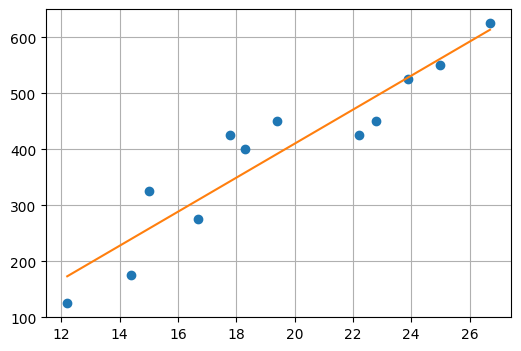

In [ ]:
plt.figure(figsize=[6,4])
plt.plot(df.temp,df.venta,'o')
plt.plot(df.temp,y_pred,'-')

plt.grid(True)

# Pytorch

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd

# Ejemplo de datos (conversión a tensores PyTorch con el mismo dtype)


X = torch.tensor(df[['temp']].values, dtype=torch.float32)
y = torch.tensor(df[['venta']].values, dtype=torch.float32)

# Normalizar los datos de entrada
X_mean = X.mean()
X_std = X.std()
X_normalized = (X - X_mean) / X_std

# Inicializar la capa lineal
modelo_lineal = nn.Linear(1, 1, bias=True)

# Definir la función de pérdida y el optimizador
criterion = nn.MSELoss()
optimizer = optim.SGD(modelo_lineal.parameters(), lr=0.1)  # Tasa de aprendizaje (learning rate) de 0.1

# Bucle de entrenamiento
num_iteraciones = 30
# Initialize lists to store parameter values at each iteration
b1_values = []
b2_values = []


for epoch in range(num_iteraciones):
    # Paso hacia adelante (forward pass)
    outputs = modelo_lineal(X_normalized)
    loss = criterion(outputs, y)

    # Actualizar los parámetros y optimización
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
        # Guardar los valores de los parámetros en cada iteración
    b1_values.append(modelo_lineal.weight.item())
    b2_values.append(modelo_lineal.bias.item())

    # Imprimir progreso
    if (epoch + 1) % 5 == 0:
        print(f'Iteracion: [{epoch + 1}/{num_iteraciones}], MSE: {loss.item():.4f}')

# Imprimir los parámetros finales
for name, param in modelo_lineal.named_parameters():
    print(f'{name}: {param.data.numpy()}')



Iteracion: [5/30], MSE: 32154.0547
Iteracion: [10/30], MSE: 5698.7734
Iteracion: [15/30], MSE: 2782.3425
Iteracion: [20/30], MSE: 2459.1882
Iteracion: [25/30], MSE: 2423.1697
Iteracion: [30/30], MSE: 2419.1279
weight: [[138.9193]]
bias: [395.3443]


In [ ]:
modelo_lineal.state_dict()

OrderedDict([('weight', tensor([[138.9193]])), ('bias', tensor([395.3443]))])

In [ ]:
y_pred=modelo_lineal.forward(X_normalized).detach().numpy()

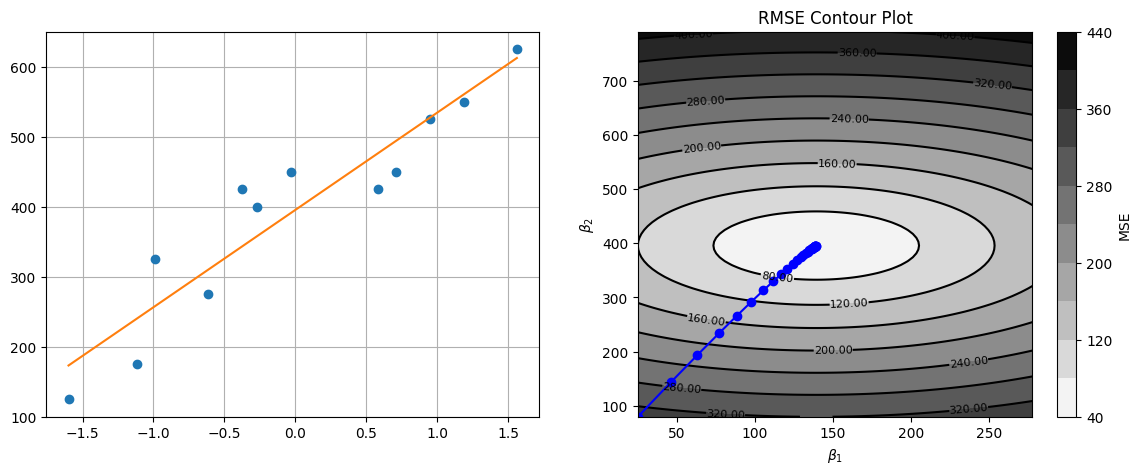

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create a grid of beta1 and beta2 values
beta1_vals = np.linspace(min(b1_values), 2*max(b1_values), 100)
beta2_vals = np.linspace(min(b2_values), 2*max(b2_values), 100)
B1, B2 = np.meshgrid(beta1_vals, beta2_vals)
RMSE = np.zeros_like(B1)

# Define the MSE function
def rmse(beta1, beta2):
    y_pred = X_normalized.view(-1).numpy()*beta1 + beta2
    return np.sqrt(np.mean((y.view(-1).numpy() - y_pred) ** 2))

# Calculate the MSE for each pair of beta1 and beta2 values
for i in range(B1.shape[0]):
    for j in range(B1.shape[1]):
        RMSE[i, j] = rmse(B1[i, j], B2[i, j])

# Plot the contour plot with annotated levels
plt.figure(figsize=(14, 5))
plt.subplot(1,2,2)
contour = plt.contourf(B1, B2, RMSE, levels=10,cmap='binary')
contour_lines = plt.contour(B1, B2, RMSE, levels=10, colors='black')
plt.clabel(contour_lines, inline=True, fontsize=8, fmt='%1.2f')
plt.plot(b1_values, b2_values, marker='o', linestyle='-', color='b')
plt.xlabel(r'$\beta_1$')
plt.ylabel(r'$\beta_2$')


plt.colorbar(contour, label='MSE')
plt.xlabel(r'$\beta_1$')
plt.ylabel(r'$\beta_2$')
plt.title('RMSE Contour Plot')

plt.subplot(1,2,1)
plt.plot(X_normalized,y,'o')
plt.plot(X_normalized,y_pred,'-')

plt.grid(True)

plt.show()


# Importancia de la normalizacion y el learning rate

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd

# Ejemplo de datos (conversión a tensores PyTorch con el mismo dtype)


X = torch.tensor(df[['temp']].values, dtype=torch.float32)
y = torch.tensor(df[['venta']].values, dtype=torch.float32)

# Inicializar la capa lineal
modelo_lineal = nn.Linear(1, 1, bias=True)

# Definir la función de pérdida y el optimizador
criterion = nn.MSELoss()
optimizer = optim.SGD(modelo_lineal.parameters(), lr=0.001)  # Tasa de aprendizaje (learning rate) de 0.1

# Bucle de entrenamiento
num_iteraciones = 100
# Initialize lists to store parameter values at each iteration
b1_values = []
b2_values = []


for epoch in range(num_iteraciones):
    # Paso hacia adelante (forward pass)
    outputs = modelo_lineal(X)
    loss = criterion(outputs, y)

    # Actualizar los parámetros y optimización
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
        # Guardar los valores de los parámetros en cada iteración
    b1_values.append(modelo_lineal.weight.item())
    b2_values.append(modelo_lineal.bias.item())

    # Imprimir progreso
    if (epoch + 1) % 5 == 0:
        print(f'Iteracion: [{epoch + 1}/{num_iteraciones}], MSE: {loss.item():.4f}')

# Imprimir los parámetros finales
for name, param in modelo_lineal.named_parameters():
    print(f'{name}: {param.data.numpy()}')

y_pred=modelo_lineal.forward(X).detach().numpy()

Iteracion: [5/100], MSE: 4324.5420
Iteracion: [10/100], MSE: 4322.3091
Iteracion: [15/100], MSE: 4320.4839
Iteracion: [20/100], MSE: 4318.6597
Iteracion: [25/100], MSE: 4316.8364
Iteracion: [30/100], MSE: 4315.0156
Iteracion: [35/100], MSE: 4313.1968
Iteracion: [40/100], MSE: 4311.3794
Iteracion: [45/100], MSE: 4309.5635
Iteracion: [50/100], MSE: 4307.7495
Iteracion: [55/100], MSE: 4305.9370
Iteracion: [60/100], MSE: 4304.1265
Iteracion: [65/100], MSE: 4302.3193
Iteracion: [70/100], MSE: 4300.5112
Iteracion: [75/100], MSE: 4298.7056
Iteracion: [80/100], MSE: 4296.9038
Iteracion: [85/100], MSE: 4295.1016
Iteracion: [90/100], MSE: 4293.3013
Iteracion: [95/100], MSE: 4291.5034
Iteracion: [100/100], MSE: 4289.7061
weight: [[20.750092]]
bias: [-0.02194091]


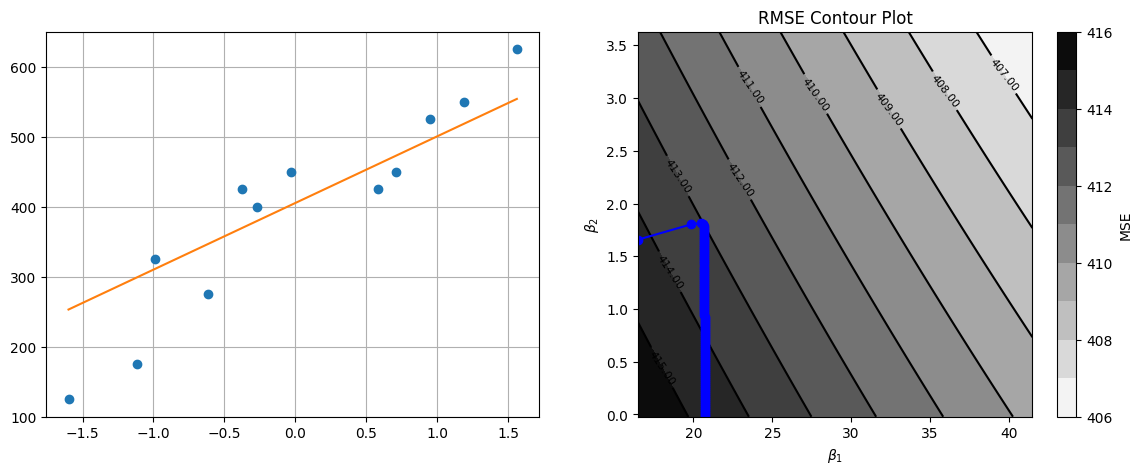

In [ ]:
# Create a grid of beta1 and beta2 values
beta1_vals = np.linspace(min(b1_values), 2*max(b1_values), 100)
beta2_vals = np.linspace(min(b2_values), 2*max(b2_values), 100)
B1, B2 = np.meshgrid(beta1_vals, beta2_vals)
RMSE = np.zeros_like(B1)

# Define the MSE function
def rmse(beta1, beta2):
    y_pred = X_normalized.view(-1).numpy()*beta1 + beta2
    return np.sqrt(np.mean((y.view(-1).numpy() - y_pred) ** 2))

# Calculate the MSE for each pair of beta1 and beta2 values
for i in range(B1.shape[0]):
    for j in range(B1.shape[1]):
        RMSE[i, j] = rmse(B1[i, j], B2[i, j])

# Plot the contour plot with annotated levels
plt.figure(figsize=(14, 5))
plt.subplot(1,2,2)
contour = plt.contourf(B1, B2, RMSE, levels=10,cmap='binary')
contour_lines = plt.contour(B1, B2, RMSE, levels=10, colors='black')
plt.clabel(contour_lines, inline=True, fontsize=8, fmt='%1.2f')
plt.plot(b1_values, b2_values, marker='o', linestyle='-', color='b')
plt.xlabel(r'$\beta_1$')
plt.ylabel(r'$\beta_2$')


plt.colorbar(contour, label='MSE')
plt.xlabel(r'$\beta_1$')
plt.ylabel(r'$\beta_2$')
plt.title('RMSE Contour Plot')

plt.subplot(1,2,1)
plt.plot(X_normalized,y,'o')
plt.plot(X_normalized,y_pred,'-')

plt.grid(True)

plt.show()
